In [1]:
import tensorflow as tf

print(tf.__version__)

2.9.2


In [2]:
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 6

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   1   0   0   0   0   0   0 152 192 135 134 165 209  25   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  68 178 253 230 234 243 244 231 223 254 207  92   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 208 239 232 219 217 218 210 207 210 212 216 226 234 212  31   0   1   0   0   0   0]
 [  0   0   0   0   1   0 104 234 210 214 216 219 211 224 228 225 209 214 214 206 223 212   0   0   0   0   0   0]
 [  0   0   0   0   0   0 205 217 216 212 216 218 212 222 217 219 210 215 211 208 208 230 100   0   0   0   0   0]
 [  0   0   0   0   0 198 233 213 219 211 216 217 212 227 215 220 213 214 209 206 209 224 225  22   0   0   0   0]
 [  0   0   0   0  63 244 223 222 212 212 216 220 213 222 214 217 209 213 211 208 214 226 249 173   0   0   0   0]
 [  0   0   0   0   0 175 231 231 207 214 212 212 213 223 218 216 205 209 208 203 224 238 210   0   0   0   0   0]
 [  0   0   0   0   0  35 236 241 209 210 211 210 

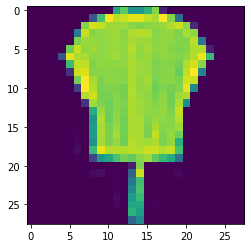

In [4]:
import numpy as np
import matplotlib.pyplot as plt

index = 56

np.set_printoptions(linewidth=320)

print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

plt.imshow(training_images[index])

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 0.9999999999999999
class with highest probability: 2


In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 5ms/step - loss: 0.4995 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3768 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.8922


In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3791 - accuracy: 0.8567


[0.3791196942329407, 0.8567000031471252]

In [10]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 1ms/step
[4.5369936e-07 1.2241992e-09 4.5439968e-08 1.3787222e-08 2.4478684e-08 5.7890703e-04 6.8479841e-07 1.0505101e-02 1.3369882e-06 9.8891348e-01]


In [11]:
print(test_labels[0])

9


In [12]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2994
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1439
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1046
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0827
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[8.5272941e-06 2.8733503e-08 9.6462090e-06 1.1984003e-03 6.2344782e-08 1.4293663e-05 1.2045623e-09 9.9855322e-01 4.3176631e-05 1.7267260e-04]
7


In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1833
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0542
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.0447773e-09 9.5465555e-07 2.7749380e-07 5.6370004e-06 2.1138971e-08 6.6537062e-08 1.8313489e-12 9.9997926e-01 1.4515190e-07 1.3521648e-05]
7


In [15]:
training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8274
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3603
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3094
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2819
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[3.4409106e-05 5.5409659e-09 5.6192999e-05 9.6400775e-04 7.4593466e-08 2.4382034e-05 2.5989941e-10 9.9839526e-01 6.5499489e-06 5.1912770e-04]
7


In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4743 - accuracy: 0.8314
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3576 - accuracy: 0.8683
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3216 - accuracy: 0.8817
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8890
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2796 - accuracy: 0.8977
Epoch 6/20
1867/1875 [============================>.] - ETA: 0s - loss: 0.2669 - accuracy: 0.9012
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9013
